# Este será 1 primeiro de muitos tutoriais sobre machine learning. Iremos começar com uma das técnicas mais básicas de todas, a Regressão Polinomial.

Basicamente, o problema de regressão é o seguinte: Eu tenho um conjunto de dados, e quero definir qual função, de uma família específica de funções, é a que melhor descreve o meu problema.

De início já é fácil perceber que este problema envolve uma etapa muito importante que deve ser determinada pelo usuário. A determinação da família de funções.

Pro exemplo, se eu estou no R2, e meus pontos estão de uma maneira quase linear, então a família de funções f(x) = a*x + b é uma pedida. Caso os meus dados se assemelhem à uma parábola, eu deverei usar a família de funções da forma f(x) = ax^2 + bx + c, com a diferente de 0.

Mas afinal, após determinar a nossa família de funções, qual critério adotar para dizer que f(x) é uma escolha melhor que g(x)?

Neste caso, escolhemos a função, dentre as funções da família, que minimiza a soma do quadrado das distâncias, onde a distância, no geral, é tomada como a distância euclideana, ou seja, a distância entre ponto a e b é o "tamanho" do segmento de reta que une a e b.

Matemáticamente, queremos minimizar o seguinte problema:


Min: g(x) = (f(x1) - x1)^2 + (f(x2) - x2)^2 + ... (f(xn) - xn)^2


Em termos de implementação, podemos utilizar a biblioteca sklearn e a biblioteca numpy



Por exemplo, vamos ver a relação entre horas estudadas e nota das provas de uma pequena turma de uma escola






In [8]:
#função utilizada para gerar inteiros aletórios dentro de um intervalo
from random import randint

#para fazermos plots
import matplotlib.pyplot as plt

#estamos desligando os warnings, pois iremos recebe-los quando ocorrer o overfitting
import warnings
warnings.filterwarnings("ignore")

#numero de alunos de uma determinada disciplina
numero_alunos = 40

#lista que ira conter esses alunos
lista_alunos = []




#classe aluno

#cada aluno ira ser identificado por um numero (id), além de ter as horas estudadas e a sua nota
class aluno():
    
    
   def  __init__(self, numero, horas_estudadas, nota):
       
       
       self.numero = numero
       self.horas_estudadas = horas_estudadas
       self.nota = nota
       
       
       
   #metodo que coloca uma nota entre 0 e 10
    
   def m_coloca_horas(self):
        
       self.horas_estudadas = randint(0, 10)
    
    
   #metodo que coloca uma nota aleatorio dentro de um intervalo, sendo funcao do numero de horas de estudo 
   def m_coloca_nota(self):
       
       self.nota = randint(max(0, self.horas_estudadas - 2), min(self.horas_estudadas + 2, 10))
        
        
   #metodo que nos auxilia a criar um dataframe mais tarde

   #creditos ao autor do seguinte link: https://stackoverflow.com/questions/34997174/how-to-convert-list-of-model-objects-to-pandas-dataframe     
   def m_para_df(self):
       
       
        return {
                
            'numero': self.numero,
            'horas estudadas': self.horas_estudadas,
            'nota':self.nota
        }
   
    



#criando uma lista com n alunos, colocando um numero único para cada um  chamando os métodos   
for i in range(0, numero_alunos):
    
    
    lista_alunos.append(aluno(i+1,0,0))
    
    lista_alunos[-1].m_coloca_horas()
    
    lista_alunos[-1].m_coloca_nota()
    
    
    


Podemos então observar, por exemplo, o que um dos objetos alunos possuem


In [9]:
print("id do aluno: {}, numero de horas estudadas = {}, nota = {}".format(lista_alunos[-1].numero, lista_alunos[-1].horas_estudadas, lista_alunos[-1].nota))


id do aluno: 40, numero de horas estudadas = 6, nota = 7


Agora, podemos fazer um plot das horas estudadas e das notas para termos uma noção de como eles se comportaram.

Mas antes disso, seria muito mais fácil colocar as informações dos alunos em um dataframe, pois assim poderíamos ter uma noção mais ampla do que esta acontecendo, além de ter mais facilidades ao fazer o plot.

In [10]:
#agora, iremos passar a nossa lista para um dataframe, pois eh mais facil de visualizarmos os dados

#importando a biblioteca pandas, que é a biblioteca utilzada para dataframes
import pandas as pd

#criando um dataframe para os alunos
df_alunos = pd.DataFrame.from_records([aluno.m_para_df() for aluno in lista_alunos])


#verificando as informações do dataframe

# mostrando a informacao sobre os 5 primeiros alunos

print(df_alunos.head())

#mostrando a informação sobre os 5 últimos alunos
print(df_alunos.tail())

   horas estudadas  nota  numero
0                8     7       1
1                5     3       2
2               10    10       3
3                9     9       4
4                0     1       5
    horas estudadas  nota  numero
35                2     0      36
36                8     8      37
37                1     1      38
38                9     9      39
39                6     7      40


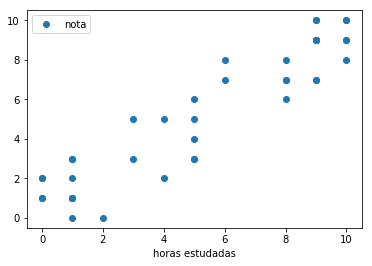

In [11]:
#plotando agora o grafico horas estudadas vs nota

df_alunos.plot(x='horas estudadas', y='nota', style='o')

Podemos ver que, no geral, uma reta descreve bem a relação entre horas estudadas e notas dos alunos para a dada matéria.

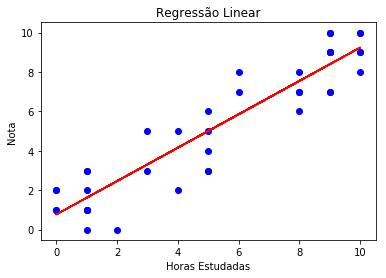

In [12]:

from sklearn.linear_model import LinearRegression



#primeiro, temos que criar um objeto da classe LinearRegression


modelo = LinearRegression()

#nao passando nenhum parametro, usaremos todos eles como default



'''

Precisamos, primeiro, transformar a nossa coluna de dataframe para um array, por isso usamos .values
Após isso, precisamos dar reshape(-1,1) para podermos colocar no formato que a biblioteca pede.
Caso não esteja nesse formato, aparecerá um Warning avisando qual reshape deve ser utilizado

'''
modelo.fit((df_alunos['horas estudadas'].values).reshape(-1,1), df_alunos['nota'].values)



plt.scatter((df_alunos['horas estudadas'].values).reshape(-1,1), df_alunos['nota'].values, color = 'blue')
plt.plot((df_alunos['horas estudadas'].values).reshape(-1,1), modelo.predict((df_alunos['horas estudadas'].values).reshape(-1,1)), color = 'red')
plt.title('Regressão Linear')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()


Agora, iremos aplicar a regressão ainda como critério o método dos mínimos quadrados para polinômios de outros graus. Como iremos ver a seguir, ocorrerá para os polinômios de graus mais elavados o conceito de Overfitting.

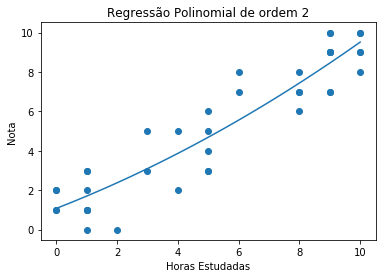

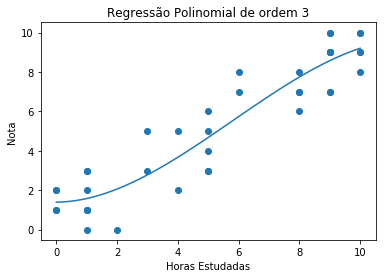

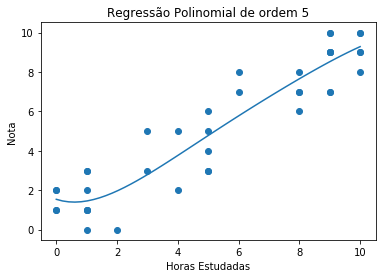

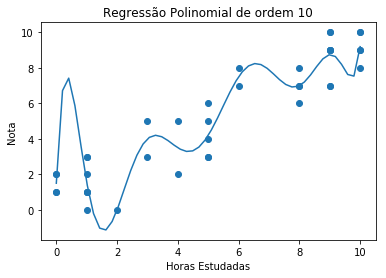

In [13]:

# agora, iremos tentar fazer uma regressao utilizando polinomios de outras ordemns, para explicarmos o conceito de overfitting
# de uma maneira mais intuitiva

'''
para isso, utilizaremos a biblioteca numpy, que possui a função polyfit, que retorna os valores dos parâmteros do polinômio,
utilizando o critério dos mínimos quadrados

'''
import numpy as np



x = df_alunos['horas estudadas'].values
    
y =  df_alunos['nota'].values


#parabola

#xp é o domínio da nossa função, que está variando de 0 à 10, que são as notas dos alunos
xp = np.linspace(0, 10)

#p1 é o polinômio de grau n
p1 = np.poly1d(np.polyfit(x,y,2))


plt.scatter(x,y)
plt.plot(xp, p1(xp))
plt.title('Regressão Polinomial de ordem 2')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()

#grau 3
xp = np.linspace(0, 10)
p1 = np.poly1d(np.polyfit(x,y,3))
plt.scatter(x,y)
plt.plot(xp, p1(xp))
plt.title('Regressão Polinomial de ordem 3')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()


#grau 5
xp = np.linspace(0, 10)
p1 = np.poly1d(np.polyfit(x,y,5))
plt.scatter(x,y)
plt.plot(xp, p1(xp))
plt.title('Regressão Polinomial de ordem 5')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()



#grau 10
xp = np.linspace(0, 10)
p1 = np.poly1d(np.polyfit(x,y,10))
plt.scatter(x,y)
plt.plot(xp, p1(xp))
plt.title('Regressão Polinomial de ordem 10')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()


Como podemos ver para o polinômio de grau 10, o programa ajustou de maneira muito ruim a nossa função, apesar de ela ser a função que minimiza a soma do quadrado das distâncias entre x e f(x). Inlcusive podemos receber Warnings sobre isso.


Agora, para exemplificarmos perfeitamente o conceito de Overfitting, iremos tentar utilizar um polinômio com grau igual ao número de pontos - 1.

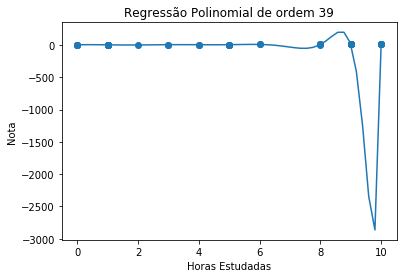

In [14]:
#grau numero_alunos
xp = np.linspace(0, 10)
p1 = np.poly1d(np.polyfit(x,y,numero_alunos - 1))
plt.scatter(x,y)
plt.plot(xp, p1(xp))
plt.title('Regressão Polinomial de ordem ' + str(numero_alunos - 1))
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()

No exemplo a cima, para cada hora estudada, o polinômio escolhe y como sendo a média aritméticas das notas para aquela hora estudada.

É claro que, como as nossas notas são geradas de maneira aleatória dentro de um certo intervalo, pode ser que o exemplo rodado não seja 100% perfeito para se notar isso.

Contudo, é claro que o conceito de Overfitting foi totalmente explorado.

Caso nossos pontos pudessem ser representados por uma função (Por que no geral não podemos representar esses dados de horas estudadas x nota como uma função?), teríamos que nossa soma do quadrado das distâncias seria igual a 0, pois cada ponto seria perfeitamente visitado pelo polinômio. Na realidade, para N pontos, precisamos de um polinômio de grau N - 1 para garantirmos que a soma do quadrado das distâncias seja igual á 0.

Para o nosso exemplo, vemos que isso não é verdade. O leitor saberia dizer o motivo?